In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,GlobalAveragePooling2D,Softmax,Dropout
from tensorflow.python.keras.utils import np_utils
import tensorflow as tf
import numpy as np
import cv2

In [2]:
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_image_labels(images,labels,id):
    plt.figure(figsize=(20,15))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.title('lable'+str(labels[id]))
        plt.imshow(images[id],cmap='binary')
        id=id+1
    plt.show()

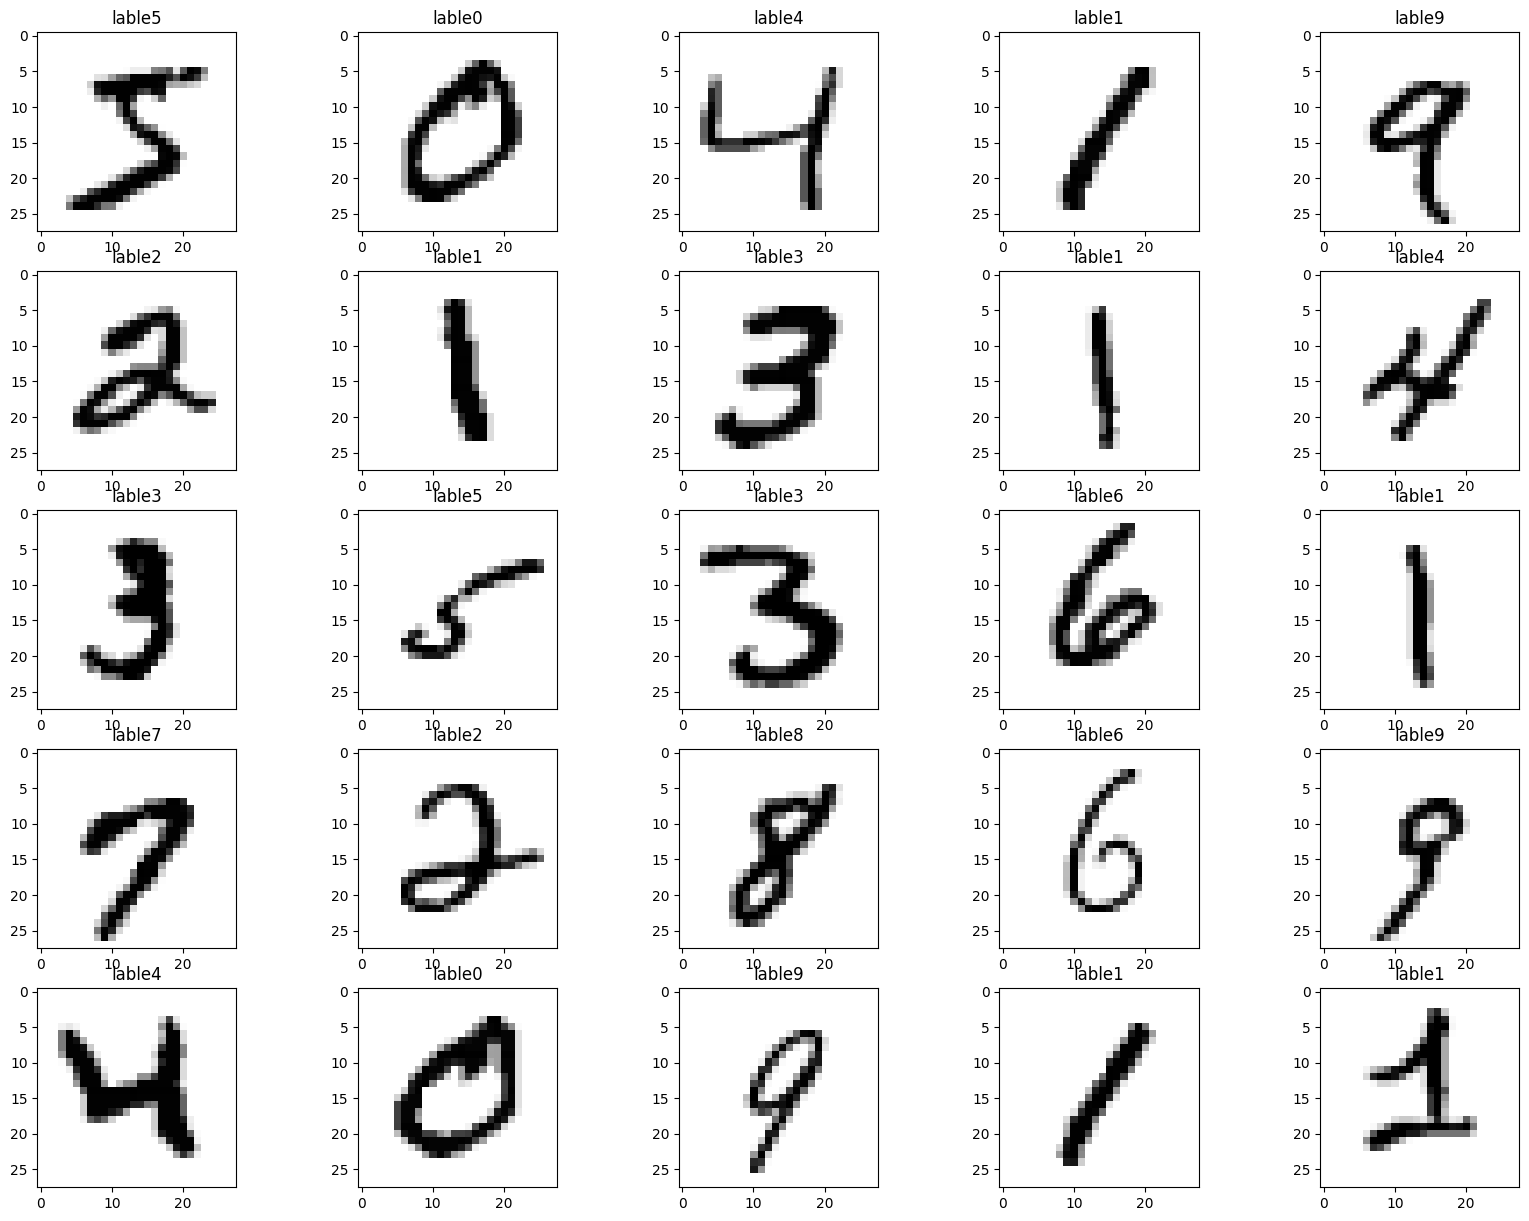

In [4]:
#顯示前25比的影像
show_image_labels(x_train_image,y_train_label,0)

In [5]:
#顯示維度
print('train',x_train_image.shape)
print('test',x_test_image.shape)

train (60000, 28, 28)
test (10000, 28, 28)


In [6]:
type(x_train_image[0])

numpy.ndarray

In [7]:
#調整影像大小28x28--->224x224
x_train=[]
for i in range(x_train_image.shape[0]):
    temp=cv2.resize(x_train_image[i],(224,224))
    x_train.append(temp)
x_train=np.array(x_train)
print(x_train.shape)

(60000, 224, 224)


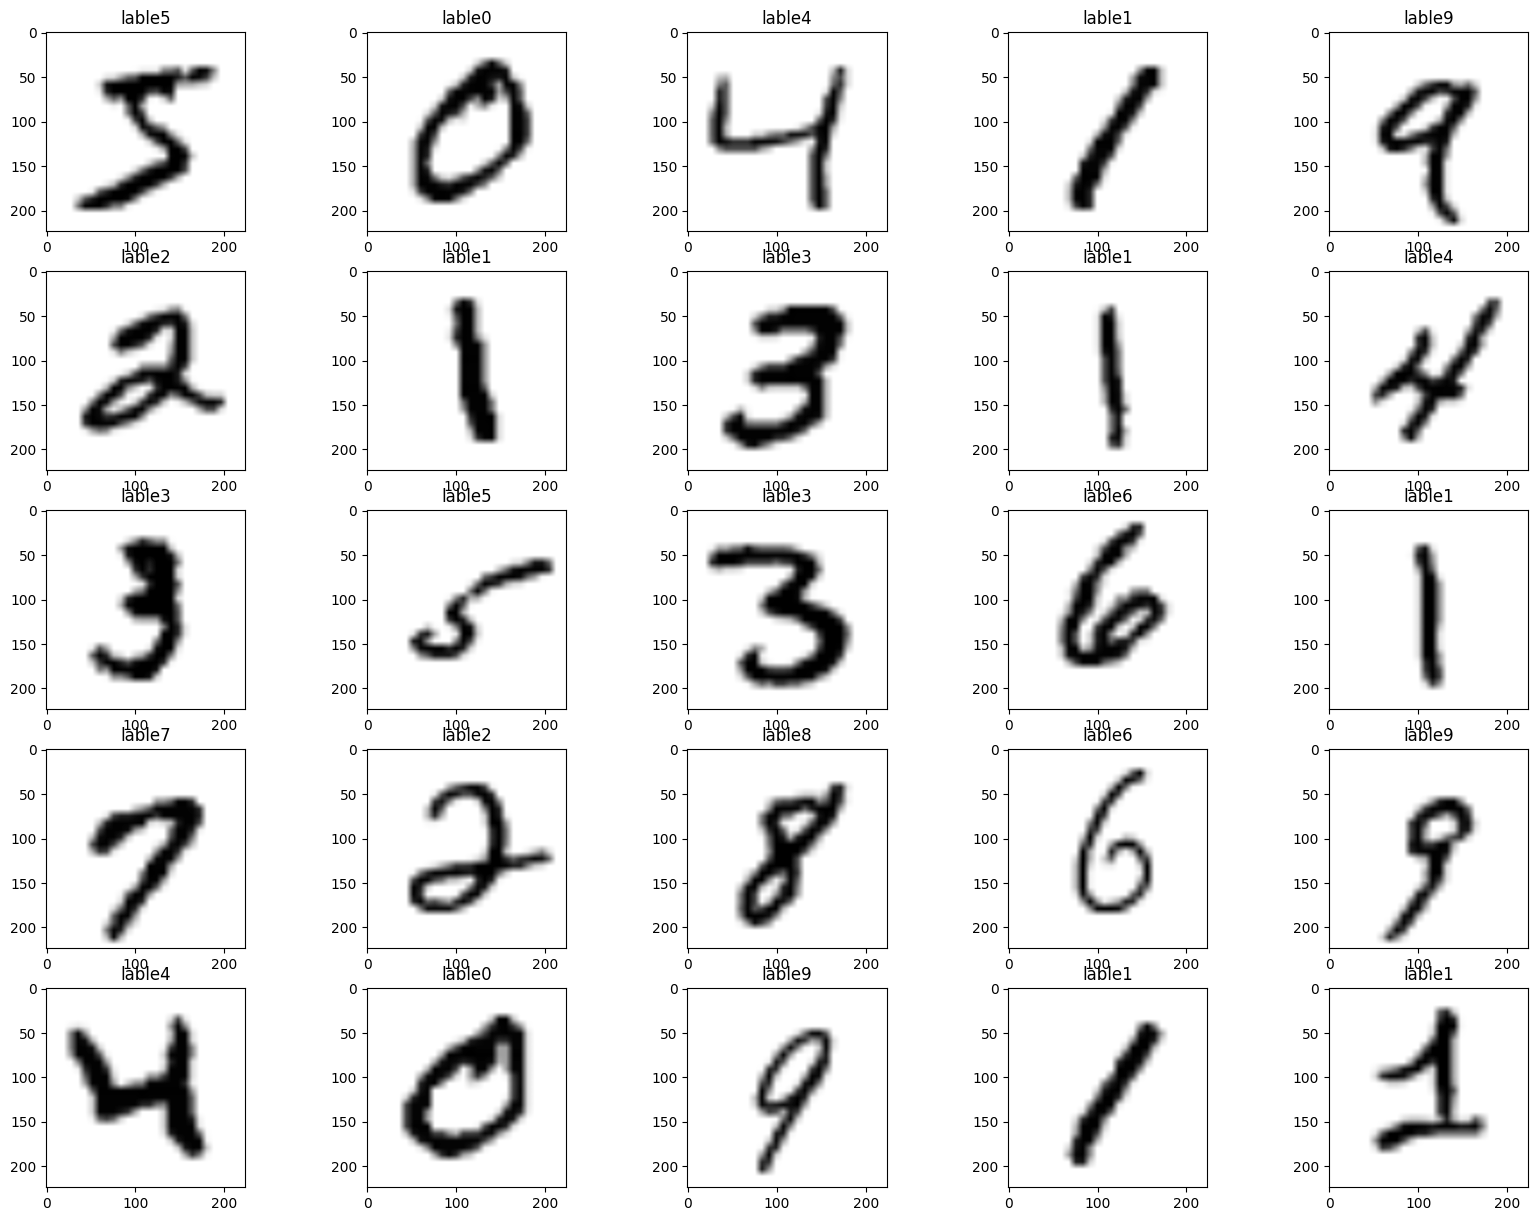

In [22]:
#顯示前25比的影像
show_image_labels(x_train,y_train_label,0)

In [8]:
#調整影像大小28x28--->224x224
x_test=[]
for i in range(x_test_image.shape[0]):
    temp=cv2.resize(x_test_image[i],(224,224))
    x_test.append(temp)
x_test=np.array(x_test)
print(x_test.shape)

(10000, 224, 224)


In [9]:
#增加一個維度
x_train_image=np.expand_dims(x_train,3)
print('train',x_train_image.shape)
print(x_train_image[0].shape)

train (60000, 224, 224, 1)
(224, 224, 1)


In [10]:
#增加一個維度
x_test_image=np.expand_dims(x_test,3)
print('test',x_test_image.shape)
print(x_test_image[0].shape)

test (10000, 224, 224, 1)
(224, 224, 1)


In [12]:
#建立模型
model=Sequential([
    #1
    Conv2D(filters=96,kernel_size=(11,11),strides=4,activation='relu',input_shape=(224,224,1)),
    Conv2D(filters=96,kernel_size=(1,1),activation='relu'),
    Conv2D(filters=96,kernel_size=(1,1),activation='relu'),
    MaxPool2D(pool_size=(3,3),strides=2,padding='same'),
    #2
    Conv2D(filters=256,kernel_size=(5,5),padding='same',activation='relu'),
    Conv2D(filters=256,kernel_size=(1,1),activation='relu'),
    Conv2D(filters=256,kernel_size=(1,1),activation='relu'),
    MaxPool2D(pool_size=(3,3),strides=2,padding='same'),
    #3
    Conv2D(filters=384,kernel_size=(3,3),padding='same',activation='relu'),
    Conv2D(filters=384,kernel_size=(1,1),activation='relu'),
    Conv2D(filters=384,kernel_size=(1,1),activation='relu'),
    MaxPool2D(pool_size=(3,3),strides=2,padding='same'),
    Dropout(0.1),
    #4
    Conv2D(filters=10,kernel_size=(3,3),padding='same',activation='relu'),
    Conv2D(filters=10,kernel_size=(1,1),activation='relu'),
    Conv2D(filters=10,kernel_size=(1,1),activation='relu'),
    GlobalAveragePooling2D(),
    Softmax()
])

In [13]:
#設定優化器、損失函數、評估模型的方式
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        11712     
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 54, 54, 96)        9312      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 54, 54, 96)        9312      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 27, 27, 256)       65792     
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 27, 27, 256)       6

In [15]:
#onehot encoding
Y_train_onehot=np_utils.to_categorical(y_train_label)
Y_test_onehot=np_utils.to_categorical(y_test_label)
print(y_train_label[0:5])
print()
print(Y_train_onehot[0:5])

[5 0 4 1 9]

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [16]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#儲存模型並使用val_accuracy作為監控
checkpoint = ModelCheckpoint(filepath = 'NIN2.h5', monitor='val_accuracy', verbose=1,
                          save_best_only=True,save_weights_only=False,
                          mode='auto', save_freq='epoch')
#使用val_accuracy作為監控，在20次迭代後，沒有看到模型準確度提升，則訓練將停止，防止過度擬合或節省訓練時間
earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0,
                          patience=20, verbose=1, mode='auto')

In [17]:
train_history=model.fit(x=x_train_image,y=Y_train_onehot,validation_split=0.2,epochs=20,batch_size=100,callbacks=[checkpoint,earlystop])

Epoch 1/20
480/480 [==============================] - 62s 98ms/step - loss: 2.0951 - accuracy: 0.2061 - val_loss: 2.0446 - val_accuracy: 0.2577

Epoch 00001: val_accuracy improved from -inf to 0.25767, saving model to NIN2.h5
Epoch 2/20
480/480 [==============================] - 41s 85ms/step - loss: 1.6844 - accuracy: 0.3819 - val_loss: 1.0258 - val_accuracy: 0.6790

Epoch 00002: val_accuracy improved from 0.25767 to 0.67900, saving model to NIN2.h5
Epoch 3/20
480/480 [==============================] - 41s 85ms/step - loss: 0.6909 - accuracy: 0.8127 - val_loss: 0.4329 - val_accuracy: 0.8547

Epoch 00003: val_accuracy improved from 0.67900 to 0.85475, saving model to NIN2.h5
Epoch 4/20
480/480 [==============================] - 41s 85ms/step - loss: 0.2894 - accuracy: 0.9244 - val_loss: 0.1915 - val_accuracy: 0.9597

Epoch 00004: val_accuracy improved from 0.85475 to 0.95975, saving model to NIN2.h5
Epoch 5/20
480/480 [==============================] - 42s 88ms/step - loss: 0.1333 - ac

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('train history')
    plt.ylabel('train')
    plt.xlabel('epoch')
    plt.legend(['train','validation'])
    plt.show()

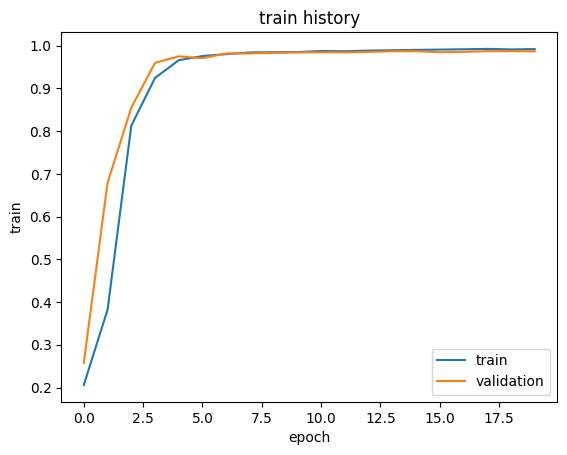

In [24]:
show_train_history(train_history,'accuracy','val_accuracy')

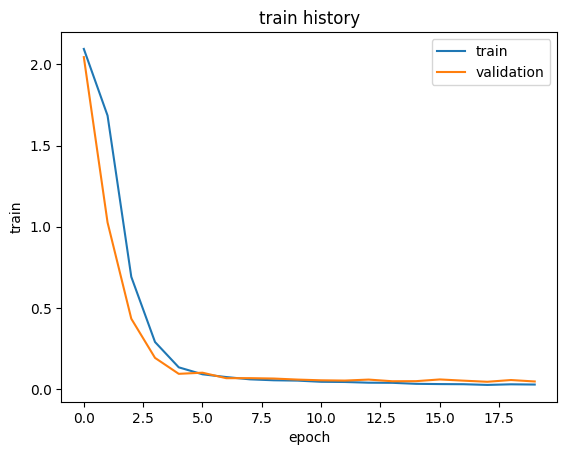

In [25]:
show_train_history(train_history,'loss','val_loss')